# MNIST Handwritten Digits Classification using Artificial Neural Network

MNIST (Modified National Institute of Standards and Technology) is a well-known dataset used in Computer Vision that was built by Yann Le Cun et. al. It is composed of images that are handwritten digits (0-9), split into a training set of 50,000 images and a test set of 10,000 where each image is of 28 x 28 pixels in width and height. I have followed codebasics tutorial on youtube for this project.

### Install Tensorflow and other required packages

In [1]:
#!pip install tensorflow
#!pip install numpy
#!pip install matplotlib
#!pip install seaborn

### Import the Packages

In [2]:
import tensorflow as tf
from tensorflow import keras
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

### Load the Dataset

In [3]:
(X_train,y_train),(X_test,y_test) = keras.datasets.mnist.load_data()

### Inspecting the Dataset

In [4]:
print(X_train.shape,y_train.shape,X_test.shape,y_test.shape)

(60000, 28, 28) (60000,) (10000, 28, 28) (10000,)


In [5]:
X_train[0]

array([[  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   3,
         18,  18,  18, 126, 136, 175,  26, 166, 255, 247, 127,   0,   0,
          0,   0],
       [  

The 2D image has pixels between 0 and 255. 0 represent black while 255 represents white.

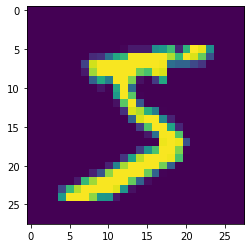

In [6]:
plt.imshow(X_train[0])

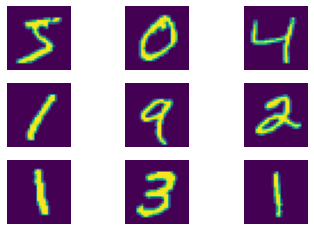

In [7]:
#showing first 9 images
for i in range(9):
    plt.subplot(3,3,i+1)
    plt.imshow(X_train[i])
    plt.axis('off')

We can clearly see X_train contains handwritten digit images. Now lets visualize y_train.

In [8]:
print(y_train[:9])

[5 0 4 1 9 2 1 3 1]


y_train contains the labels for the X_train handwrittend digit images.

### Preparing the model

First of all, we will normalize X_train and X_test values between 0 and 1 by dividing it the maximum i-e 255. The machine learning and deep learning algorithims work well with values scaled between 0 and 1.

In [9]:
X_train = X_train/255.0
X_test = X_test/255.0

Artificial neural network does not work well with 2D images. So we need to convert 2D images into 1D by flattening them.

In [10]:
X_train_flattened = X_train.reshape(len(X_train),28*28)
X_test_flattened = X_test.reshape(len(X_test),28*28)

In [11]:
print(X_train_flattened.shape,X_test_flattened.shape)

(60000, 784) (10000, 784)


Our 2D images are now converted into 1D images.

### Building the Model

Here we will make sequential model with one input layer of length 784, densely connected with output layer of length 10. I am using sigmoid as activation function, adam optimizer, sparse categorical cross entropy as loss function, and accuracy as metric. 

In [12]:
model = keras.Sequential([
    keras.layers.Dense(10,input_shape=(784,),activation = 'sigmoid')
])

model.compile(
    optimizer = 'adam',
    loss = 'sparse_categorical_crossentropy',
    metrics = ['accuracy']   
)

model.fit(X_train_flattened, y_train, epochs = 10)

Epoch 1/10
1875/1875 [==============================] - 3s 1ms/step - loss: 0.4649 - accuracy: 0.8785
Epoch 2/10
1875/1875 [==============================] - 2s 1ms/step - loss: 0.3043 - accuracy: 0.9152
Epoch 3/10
1875/1875 [==============================] - 2s 1ms/step - loss: 0.2832 - accuracy: 0.9205
Epoch 4/10
1875/1875 [==============================] - 2s 1ms/step - loss: 0.2729 - accuracy: 0.9240
Epoch 5/10
1875/1875 [==============================] - 2s 1ms/step - loss: 0.2665 - accuracy: 0.9263
Epoch 6/10
1875/1875 [==============================] - 2s 1ms/step - loss: 0.2617 - accuracy: 0.9265
Epoch 7/10
1875/1875 [==============================] - 2s 1ms/step - loss: 0.2580 - accuracy: 0.9288
Epoch 8/10
1875/1875 [==============================] - 2s 1ms/step - loss: 0.2556 - accuracy: 0.9289
Epoch 9/10
1875/1875 [==============================] - 2s 1ms/step - loss: 0.2525 - accuracy: 0.9298
Epoch 10/10
1875/1875 [==============================] - 2s 1ms/step - loss: 0.250

### Evaluating the model

In [13]:
model.evaluate(X_test_flattened,y_test)

313/313 [==============================] - 0s 1ms/step - loss: 0.2647 - accuracy: 0.9269


[0.2647132873535156, 0.9269000291824341]

Our model accuracy is 92.6% which is good considering that we only used artificial network with only an input layer and output layer.

### Predicting test images

7
2
1
0
4
1
4
9
6


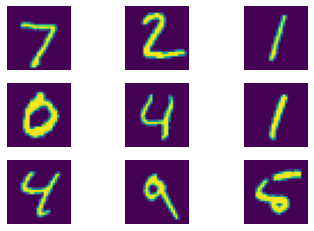

In [14]:
#checking out how our machine have learned by comparing first ten test values and predicted values
for i in range(9):
    plt.subplot(3,3,i+1)
    plt.imshow(X_test[i])
    plt.axis('off')
    
prediction = model.predict(X_test_flattened)
for i in range(9):
    print(np.argmax(prediction[i]))

Our model is doing a cool job!

### Plotting Confusion Matrix to see details of how well our model is working

In [15]:
y_predicted_labels = [np.argmax(i) for i in prediction]

In [16]:
cm = tf.math.confusion_matrix(labels = y_test, predictions = y_predicted_labels)

Text(87.0, 0.5, 'Truth')

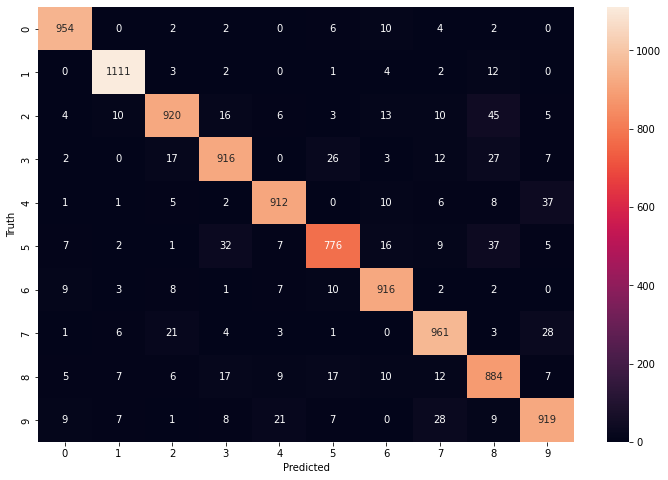

In [17]:
plt.figure(figsize = (12,8))
sns.heatmap(cm,annot = True,fmt = 'd')
plt.xlabel("Predicted")
plt.ylabel("Truth")

Confusion Matrix heatmap shows that our model has predicted label 1, 1111 times right. It had most trouble with predicting number 2 and number 8. 

### Adding a hidden layer

In [18]:
model = keras.Sequential([
    keras.layers.Dense(100,input_shape=(784,),activation = 'relu'),
    keras.layers.Dense(10,activation = 'sigmoid')
])

model.compile(
    optimizer = 'adam',
    loss = 'sparse_categorical_crossentropy',
    metrics = ['accuracy']   
)

model.fit(X_train_flattened, y_train, epochs = 5)

Epoch 1/5
1875/1875 [==============================] - 4s 2ms/step - loss: 0.2776 - accuracy: 0.9225
Epoch 2/5
1875/1875 [==============================] - 3s 2ms/step - loss: 0.1273 - accuracy: 0.9628
Epoch 3/5
1875/1875 [==============================] - 3s 2ms/step - loss: 0.0886 - accuracy: 0.9739
Epoch 4/5
1875/1875 [==============================] - 4s 2ms/step - loss: 0.0674 - accuracy: 0.9796
Epoch 5/5
1875/1875 [==============================] - 4s 2ms/step - loss: 0.0528 - accuracy: 0.9840


In [19]:
# evaluating the model again after adding hidden layer
model.evaluate(X_test_flattened,y_test)

313/313 [==============================] - 1s 2ms/step - loss: 0.0833 - accuracy: 0.9753


[0.08325392752885818, 0.9753000140190125]

We have increased accuracy from 92.6% to 97.4% by adding just one hidden layer.

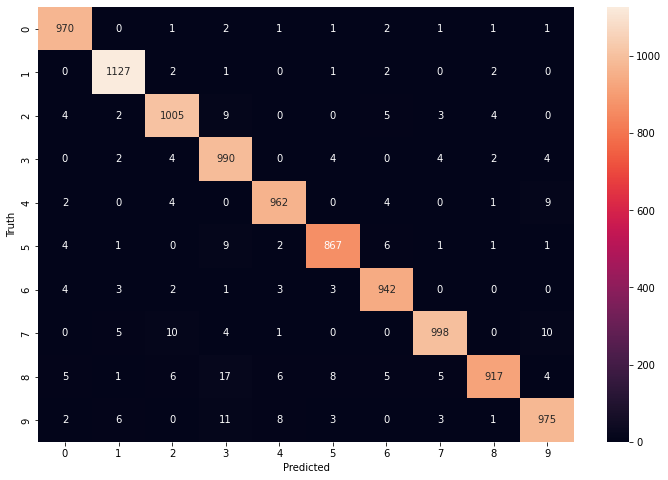

In [20]:
#plotting cm for the model
prediction1 = model.predict(X_test_flattened)
y1_predicted_labels = [np.argmax(i) for i in prediction1]
cm1 = tf.math.confusion_matrix(labels = y_test, predictions = y1_predicted_labels)
plt.figure(figsize = (12,8))
sns.heatmap(cm1,annot = True,fmt = 'd')
plt.xlabel("Predicted")
plt.ylabel("Truth")
plt.savefig('MNISTClassification.png')